### Problem Statement: Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and 
do necessary transformations and select the best model using R or Python.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV, cross_val_score
from IPython.display import display_html 
import warnings
warnings.filterwarnings('ignore')

In [80]:
ds = pd.read_csv('delivery_time.csv')
ds['Delivery Time']

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

## Exploratory Data Analysis

In [4]:
print(ds.shape)
print(ds.dtypes)
print(ds.isnull().sum())
ds.describe(include='all')

(21, 2)
Delivery Time    float64
Sorting Time       int64
dtype: object
Delivery Time    0
Sorting Time     0
dtype: int64


,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

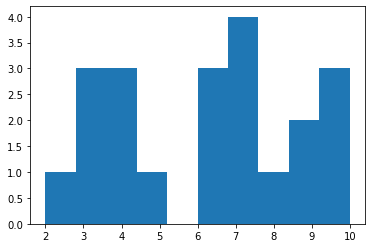

In [5]:
#to check whether input is normally distributed or not
import matplotlib.pyplot as plt
plt.hist(ds['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x173b6874eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x173b6885550>,
 'boxes': [<matplotlib.lines.Line2D at 0x173b6874b50>],
 'medians': [<matplotlib.lines.Line2D at 0x173b6885c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x173b6885f70>],
 'means': []}

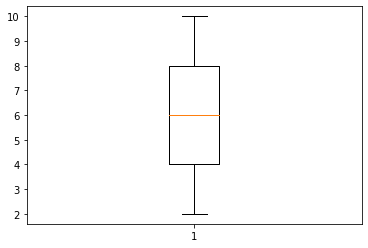

In [6]:
# to check whehter input data is symmetric
plt.boxplot(ds['Sorting Time'])

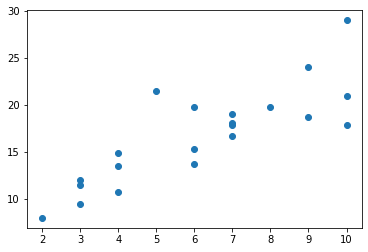

In [7]:
# sorting time and Deliverty time have positive relation
plt.scatter(ds['Sorting Time'],ds['Delivery Time'])

In [8]:
ds.corr()
# Theres is 82% correlation strength between input and output which is compartively less.
# correlation streng

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [81]:
x_input = ds[['Sorting Time']]
y_output = ds[['Delivery Time']]

## Model Building and Training

### Without k-fold validation

In [82]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
le_model = LinearRegression()
le_model.fit(x_input,y_output)

# Decision Tree
#dt_model = DecisionTreeRegressor()
# Tweaking hyperparameters 
dt_model = DecisionTreeRegressor(criterion ='poisson', max_depth = 4, min_samples_split = 4)
dt_model.fit(x_input,y_output)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(x_input,y_output)

# AdaBoost
ab_model = AdaBoostRegressor()
ab_model.fit(x_input,y_output)

# GradientBoosting
gb_model = GradientBoostingRegressor()
gb_model_tweaked = GradientBoostingRegressor(criterion='mae',loss='lad')
gb_model.fit(x_input,y_output)
gb_model_tweaked.fit(x_input,y_output)

GradientBoostingRegressor(criterion='mae', loss='lad')

### With k-fold validation - does not work well with outliers

In [94]:
cv_score_le = cross_val_score(estimator=le_model, X=x_input, y=y_output, cv=4)
print("CV score is for LR model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_le,cv_score_le.mean(),cv_score_le.std()))

cv_score_dt = cross_val_score(estimator=dt_model, X=x_input, y=y_output, cv=4)
print("CV score is for DT model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_dt,cv_score_dt.mean(),cv_score_dt.std()))

cv_score_rf = cross_val_score(estimator=rf_model, X=x_input, y=y_output, cv=4)
print("CV score is for RF model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_rf,cv_score_rf.mean(),cv_score_rf.std()))

cv_score_ab = cross_val_score(estimator=ab_model, X=x_input, y=y_output, cv=4)
print("CV score is for AB Model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_ab,cv_score_ab.mean(),cv_score_ab.std()))

cv_score_gb = cross_val_score(estimator=gb_model, X=x_input, y=y_output, cv=4)
print("CV score is for GB model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_gb,cv_score_gb.mean(),cv_score_gb.std()))

CV score is for LR model = [0.40800127 0.06478567 0.54132932 0.47630451]
 mean accuracy = 0.3726051900957024
 std dev  = 0.18386620322788624
CV score is for DT model = [ 0.09741032 -0.25509156 -0.2544546   0.11275102]
 mean accuracy = -0.07484620566405414
 std dev  = 0.18000874711136436
CV score is for RF model = [-0.00654749 -0.2824538   0.2863748   0.15208581]
 mean accuracy = 0.03736483089125178
 std dev  = 0.21176585774583065
CV score is for AB Model = [-0.12996759 -0.39827228  0.13932879  0.0438214 ]
 mean accuracy = -0.08627242037194524
 std dev  = 0.20437311828408597
CV score is for GB model = [-0.23932977 -0.25426927  0.10541843  0.11118375]
 mean accuracy = -0.0692492144249684
 std dev  = 0.17764054707113205


### GridSearchCV for Decision Tree

In [11]:
grid_model = GridSearchCV(estimator= dt_model, param_grid = { 'criterion' : ['friedman_mse', 'mse', 'mae'],
                                                    'max_depth' : [1,2,3,4,5,6,7],
                                                    'min_samples_split' : [2,3,4,5]
                                               })
grid_model.fit(x_input,y_output)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'poisson', 'max_depth': 4, 'min_samples_split': 4}
-0.13016842719175586


### GridSearchCV for Gradient Boosting

In [38]:
grid_model_gb = GridSearchCV(estimator= gb_model, param_grid = { 'criterion' : ["mse", "friedman_mse", "mae", "poisson"],
                                                    'loss' :['ls', 'lad', 'huber', 'quantile']
                                               })
grid_model_gb.fit(x_input,y_output)
print(grid_model_gb.best_params_)
print(grid_model_gb.best_score_)

{'criterion': 'mae', 'loss': 'lad'}
-0.146097937152259


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

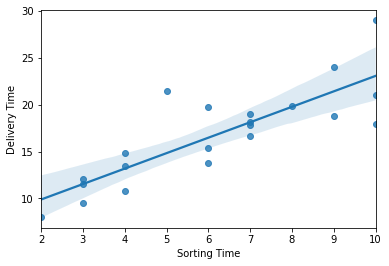

In [41]:
# displays the best fit regression line
import seaborn as sns
sns.regplot(x='Sorting Time',y='Delivery Time', data=ds)

### Model Prediction

In [96]:
# using training data
y_predict_train_le         = le_model.predict(x_input)
y_predict_train_dt         = dt_model.predict(x_input)
y_predict_train_rf         = rf_model.predict(x_input)
y_predict_train_ab         = ab_model.predict(x_input)
y_predict_train_gb         = gb_model.predict(x_input)
y_predict_train_gb_tweaked = gb_model_tweaked.predict(x_input)#tweaked with gridseachCV

# using test data
# Linear Regressor
test_data = pd.DataFrame({'Test Sorting Time': [0,2,4,6,7,8,9,10,12,15,19]})# passing test data
y_predict_test_le = le_model.predict(test_data)
test_data['Predicted Delivery Time']= y_predict_test_le

# Decision Tree
y_predict_test_dt = dt_model.predict(test_data)
test_data['Predicted Delivery Time']= y_predict_test_dt

# Gradient Boosting
y_predict_test_gb = gb_model.predict(test_data_gb)
test_data_gb['Predicted Delivery Time']= y_predict_test_gb

# Random Boosting
y_predict_test_rf = rf_model.predict(test_data_rf)
test_data_rf['Predicted Delivery Time']= y_predict_test_rf


predicted_ds =  pd.DataFrame({'Test Sorting Time': [0,2,4,6,7,8,9,10,12,15,19]})# passing test data
predicted_ds['Pred DT LR'] = y_predict_test_le
predicted_ds['Pred DT GB'] = y_predict_test_gb
predicted_ds['Pred DT RM'] = y_predict_test_rf
predicted_ds['Pred DT DT'] = y_predict_test_dt
print(predicted_ds)

#to display predicted values side by side for comparison
#df1_styler = test_data.style.set_table_attributes("style='display:inline'").set_caption('Linear Regressor')
#df2_styler = test_data_gb['Predicted Delivery Time'].style.set_table_attributes("style='display:inline'").set_caption('Gradient Boosting')
#df3_styler = test_data_rf['Predicted Delivery Time'].style.set_table_attributes("style='display:inline'").set_caption('Random Forest')
#display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

    Test Sorting Time  Pred DT LR  Pred DT GB  Pred DT RM  Pred DT DT
0                   0    6.582734    8.000348    8.998227   13.682727
1                   2    9.880774    8.000348    8.998227   13.682727
2                   4   13.178814   13.043487   12.893646   13.682727
3                   6   16.476853   16.283622   16.131409   13.682727
4                   7   18.125873   17.904960   17.805392   17.905000
5                   8   19.774893   19.829904   19.206435   19.830000
6                   9   21.423913   21.374838   21.391058   21.375000
7                  10   23.072933   22.632982   22.900179   22.633333
8                  12   26.370973   22.632982   22.900179   22.633333
9                  15   31.318032   22.632982   22.900179   22.633333
10                 19   37.914112   22.632982   22.900179   22.633333


### Evaluation Metrics for Training Data

In [59]:
print("REGRESSOR MODEL")
print("MSE      = ",round(mean_squared_error(y_output,y_predict_train_le),2))
print("R2 score =",round(r2_score(y_output,y_predict_train_le),2))
print("MAE      =",round(mean_absolute_error(y_output,y_predict_train_le),2))

print("\nDECISION TREE MODEL")
print("MSE      = ",round(mean_squared_error(y_output,y_predict_train_dt),2))
print("R2 score =",round(r2_score(y_output,y_predict_train_dt),2))
print("MAE      =",round(mean_absolute_error(y_output,y_predict_train_dt),2))

print("\nRANDOM FOREST")
print("MSE      = ",round(mean_squared_error(y_output,y_predict_train_rf),2))
print("R2 score =",round(r2_score(y_output,y_predict_train_rf),2))
print("MAE      =",round(mean_absolute_error(y_output,y_predict_train_rf),2))

print("\nADABOOST")
print("MSE      = ",round(mean_squared_error(y_output,y_predict_train_ab),2))
print("R2 score =",round(r2_score(y_output,y_predict_train_ab),2))
print("MAE      =",round(mean_absolute_error(y_output,y_predict_train_ab),2))

print("\nGRADIENT BOOSTING\t GRADIENT BOOSTING TWEAKED WITH GRIDSEARCHCV")
print("MSE      = ",round(mean_squared_error(y_output,y_predict_train_gb),2),"\t MSE =",
                   round(mean_squared_error(y_output,y_predict_train_gb_tweaked),2))
print("R2 score =",round(r2_score(y_output,y_predict_train_gb),2),"\t MSE =",
                   round(r2_score(y_output,y_predict_train_gb_tweaked),2))
print("MAE      =",round(mean_absolute_error(y_output,y_predict_train_gb),2),"\t MSE =",
                   round(mean_absolute_error(y_output,y_predict_train_gb_tweaked),2))

#print("\nGRADIENT BOOSTING TWEAKED WITH GRIDSEARCHCV")
#print("MSE      = ",round(mean_squared_error(y_output,y_predict_train_gb_tweaked),2))
#print("R2 score =",round(r2_score(y_output,y_predict_train_gb_tweaked),2))
#print("MAE      =",round(mean_absolute_error(y_output,y_predict_train_gb_tweaked),2))

REGRESSOR MODEL
MSE      =  7.79
R2 score = 0.68
MAE      = 2.09

DECISION TREE MODEL
MSE      =  11.91
R2 score = 0.51
MAE      = 2.58

RANDOM FOREST
MSE      =  6.02
R2 score = 0.75
MAE      = 1.93

ADABOOST
MSE      =  7.22
R2 score = 0.71
MAE      = 2.12

GRADIENT BOOSTING	 GRADIENT BOOSTING TWEAKED WITH GRIDSEARCHCV
MSE      =  5.42 	 MSE = 6.81
R2 score = 0.78 	 MSE = 0.72
MAE      = 1.67 	 MSE = 1.53


Inferences: 

Not used Test-train split here as no. of records is very less (21 rows)
So if we do test-train split then while training the data the model may miss out some pattern which may be present in the test split

The overall accuracy for Gradient Boosting Model is highest (ie. 78% ) for training data
Also the MSE & MAE is the least for the Gradient Boosting Model.

The accuracy for linear regression is the least (ie. 68% ) for training data.

Now, to decide which model will perform better with unseen data we will check with k-fold CV, we can't use train test split here for the above-mentioned reason.

From k fold validation we observed that
The mean accuracy was 37% for Linear Regression model
Mean accuracy was 3% for Random Forest model
Mean accuracy was in negatives for all other models

Thus in production line Linear Regressor model will be best for prediction.

So, Linear Regression is a better model for predicting delivery time based on the sorting time.